In [11]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sys
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../data/cleaned_heart_disease.csv')

In [13]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,1.007386,0.705176,0.303643,0.489727,1.368109,-0.361400,-0.871794,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,1.432034,1.518569,0.789967,-1.181478,0.611589,4.411152,0.879408,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,1.432034,-0.650479,0.266939,-0.345875,1.651804,2.820301,0.003807,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,-1.752828,-0.108217,0.459634,1.961979,2.502889,-0.361400,-0.871794,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,-1.328180,-0.108217,0.037541,1.365120,0.517024,-0.361400,-0.871794,0,0,...,0,0,0,0,0,0,0,1,1,0


In [14]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
count,920.000000,9.200000e+02,9.200000e+02,920.000000,9.200000e+02,9.200000e+02,9.200000e+02,9.200000e+02,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,-4.633974e-17,-7.723291e-18,0.000000,3.089316e-17,-7.723291e-18,6.178632e-17,-3.089316e-17,0.789130,0.318478,...,0.221739,0.050000,0.150000,0.601087,0.194565,0.366304,0.710870,0.220652,0.741304,0.208696
std,265.725422,1.000544e+00,1.000544e+00,1.000544,1.000544e+00,1.000544e+00,1.000544e+00,1.000544e+00,0.408148,0.466140,...,0.415642,0.218063,0.357266,0.489941,0.396081,0.482056,0.453605,0.414912,0.438156,0.406597
min,1.000000,-2.708286e+00,-7.157623e+00,-1.834346,-3.091427e+00,-3.265577e+00,-3.613997e-01,-8.717944e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,-6.912073e-01,-6.504787e-01,-0.203326,-7.039908e-01,-8.068863e-01,-3.613997e-01,-8.717944e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,460.500000,5.192709e-02,-1.082166e-01,0.211884,9.182113e-02,-3.340612e-01,-3.613997e-01,3.806963e-03,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,690.250000,6.888994e-01,4.340454e-01,0.615624,7.284707e-01,6.115890e-01,-3.613997e-01,8.794083e-01,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,920.000000,2.493654e+00,3.687618e+00,3.698734,2.558838e+00,5.056145e+00,4.411152e+00,2.630611e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_pca = df.copy()
X = df_pca.drop(columns=['id'])

In [17]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [19]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

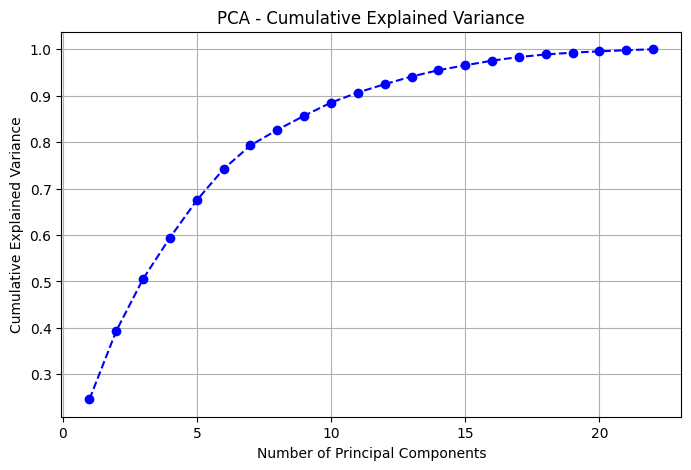

Optimal number of components to retain 95% variance: 14


In [20]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Determine optimal number of components to retain ~95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {n_components}")

In [21]:
pca_final = PCA(n_components = n_components)
X_pca_final = pca_final.fit_transform(X)

In [22]:
df_pca = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.503866  0.954783  0.732987 -0.088224  0.604722  1.444304 -0.746636   
1  3.199256  2.857073 -0.371517 -1.519107 -0.862544 -1.857412 -0.831739   
2  2.267426  1.937140 -1.550915 -0.334122 -0.945543 -0.041313 -1.333970   
3 -1.312748  1.485882 -0.635140  2.206834  1.760413  1.157457 -0.925784   
4 -1.696376  0.668599 -0.459261  0.491219  1.221247  0.622187 -0.387047   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0  0.152167 -0.238453 -0.715980 -0.148144  0.122196 -0.693324  0.173931  
1 -1.151239 -0.056316  0.615357  0.067190  0.495249  0.615786  0.142328  
2 -0.328117  0.102286 -1.098810 -0.232884  0.197729  0.377341  0.192694  
3 -0.132201 -0.056617  0.044728  0.947450 -0.003432 -0.455571  0.123040  
4 -0.149115 -0.854756  0.354631 -0.688825 -0.324661 -0.348772 -0.599831  


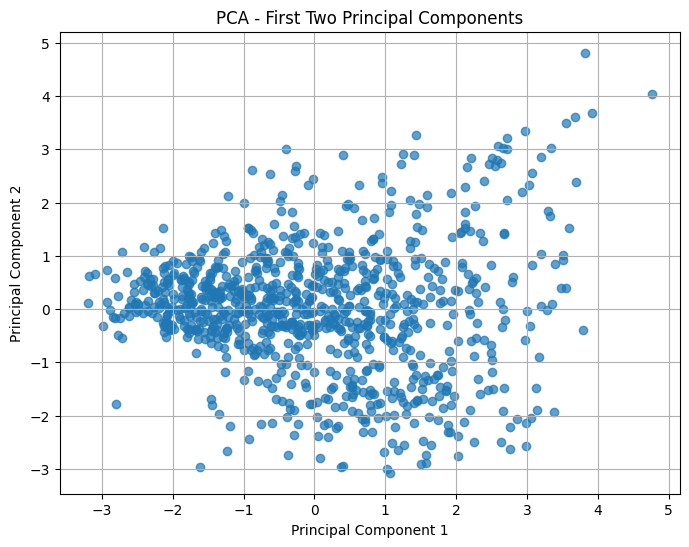

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()